**Abusive Game User Detection Analysis**

- Outlier detection through anomaly detection
- Data Source: https://www.kaggle.com/c/pubg-finish-placement-prediction/data?select=test_V2.csv
- Define behavioral patterns of suspected bug-abusing players and detect abnormal users
- Compare the number of bug reports before and after model implementation  
- Compare changes in new user acquisition before and after model implementation  
- Compare churn rates of existing users before and after model implementation

In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)

df_train = pd.read_csv("game_1.csv")
df_test = pd.read_csv("game_2.csv")

df = pd.concat([df_train, df_test], axis=0)
df.head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,0,24,0,0,5,247.30,2,0,4,17,1050,2,1,65.32,29,28,1,591.3,0,0.0,0,0,782.40,4,1458,0.8571
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.55,26,23,0,0.0,0,0.0,0,0,119.60,3,1511,0.0400
2,2,878242,2,0,1,93.73,1,0,2,54,1404,0,0,0.00,28,28,1,0.0,0,0.0,0,0,3248.00,5,1583,0.7407
3,3,1319841,3,0,0,95.88,0,0,0,86,1069,0,0,0.00,97,94,0,0.0,0,0.0,0,0,21.49,1,1489,0.1146
4,4,1757883,4,0,1,0.00,0,0,1,58,1034,0,0,0.00,47,41,0,0.0,0,0.0,0,0,640.80,4,1475,0.5217


In [3]:
import os
import matplotlib.pyplot as plt

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    IMAGES_PATH = os.path.join("images")
    os.makedirs(IMAGES_PATH, exist_ok=True)
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


**Data Preprocessing & EDA**  

In [4]:
print('df :', df.shape)

df : (6225249, 26)


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6225249 entries, 0 to 1867912
Data columns (total 26 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Id               int64  
 1   groupId          int64  
 2   matchId          int64  
 3   assists          int64  
 4   boosts           int64  
 5   damageDealt      float64
 6   DBNOs            int64  
 7   headshotKills    int64  
 8   heals            int64  
 9   killPlace        int64  
 10  killPoints       int64  
 11  kills            int64  
 12  killStreaks      int64  
 13  longestKill      float64
 14  maxPlace         int64  
 15  numGroups        int64  
 16  revives          int64  
 17  rideDistance     float64
 18  roadKills        int64  
 19  swimDistance     float64
 20  teamKills        int64  
 21  vehicleDestroys  int64  
 22  walkDistance     float64
 23  weaponsAcquired  int64  
 24  winPoints        int64  
 25  winPlacePerc     float64
dtypes: float64(6), int64(20)
memory usage: 1.3 GB


In [6]:
print(df.isnull().sum())

Id                       0
groupId                  0
matchId                  0
assists                  0
boosts                   0
damageDealt              0
DBNOs                    0
headshotKills            0
heals                    0
killPlace                0
killPoints               0
kills                    0
killStreaks              0
longestKill              0
maxPlace                 0
numGroups                0
revives                  0
rideDistance             0
roadKills                0
swimDistance             0
teamKills                0
vehicleDestroys          0
walkDistance             0
weaponsAcquired          0
winPoints                0
winPlacePerc       1867913
dtype: int64


In [7]:
df[df['winPlacePerc'].isna()].head()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
0,47734,1659463,47734,0,0,100.0,1,0,0,59,1000,0,0,0.000,50,45,0,0.0,0,0.0,1,0,421.50,7,1500,NaN
1,47735,1659508,47735,0,1,400.0,2,0,3,9,1200,4,2,15.420,48,47,1,0.0,0,0.0,0,0,655.80,4,1526,NaN
2,47736,1659555,47736,0,0,0.0,0,0,0,72,1216,0,0,0.000,29,28,0,0.0,0,0.0,0,0,74.58,1,1475,NaN
3,47737,1659621,47737,0,0,68.6,0,0,0,68,1177,0,0,0.000,97,92,0,0.0,0,0.0,0,0,167.20,2,1464,NaN
4,47738,1659675,47738,0,1,370.5,3,0,1,45,1013,1,1,5.968,27,26,0,0.0,0,0.0,0,0,146.70,3,1505,NaN


In [8]:
df = df.dropna()
df.isnull().sum()

Id                 0
groupId            0
matchId            0
assists            0
boosts             0
damageDealt        0
DBNOs              0
headshotKills      0
heals              0
killPlace          0
killPoints         0
kills              0
killStreaks        0
longestKill        0
maxPlace           0
numGroups          0
revives            0
rideDistance       0
roadKills          0
swimDistance       0
teamKills          0
vehicleDestroys    0
walkDistance       0
weaponsAcquired    0
winPoints          0
winPlacePerc       0
dtype: int64

In [9]:
df.describe()

,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc
count,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06,4.357336e+06
mean,3.102678e+06,1.024777e+06,2.385539e+04,2.656320e-01,9.636856e-01,1.329033e+02,6.901455e-01,2.385866e-01,1.187169e+00,4.703440e+01,1.080898e+03,9.344958e-01,5.547651e-01,1.987925e+01,4.207759e+01,4.058035e+01,1.649345e-01,4.238835e+02,2.557985e-03,4.136261e+00,1.388555e-02,5.146264e-03,1.055122e+03,3.457289e+00,1.500504e+03,4.718663e-01
std,1.797477e+06,6.967197e+05,1.378227e+04,6.342160e-01,1.560643e+00,1.699439e+02,1.191514e+00,6.103033e-01,2.366389e+00,2.732772e+01,1.237119e+02,1.566192e+00,7.223452e-01,4.586552e+01,2.267769e+01,2.206667e+01,4.672004e-01,1.222927e+03,6.346679e-02,2.757015e+01,1.329266e-01,7.425362e-02,1.116122e+03,2.402109e+00,4.253571e+01,3.079147e-01
min,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.550000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.500000e+02,-0.000000e+00
25%,1.537746e+06,4.741378e+05,1.191400e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.300000e+01,1.000000e+03,0.000000e+00,0.000000e+00,0.000000e+00,2.800000e+01,2.600000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.334000e+02,2.000000e+00,1.491000e+03,1.979000e-01
50%,3.110606e+06,9.430320e+05,2.383700e+04,0.000000e+00,0.000000e+00,8.776000e+01,0.000000e+00,0.000000e+00,0.000000e+00,4.700000e+01,1.029000e+03,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+01,2.900000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.732000e+02,3.000000e+00,1.500000e+03,4.583000e-01
75%,4.657295e+06,1.418544e+06,3.580100e+04,0.000000e+00,1.000000e+00,1.884000e+02,1.000000e+00,0.000000e+00,1.000000e+00,7.000000e+01,1.126000e+03,1.000000e+00,1.000000e+00,1.629000e+01,4.900000e+01,4.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.808000e+03,5.000000e+00,1.510000e+03,7.407000e-01
max,6.224522e+06,2.700605e+06,4.773300e+04,2.000000e+01,1.800000e+01,6.384000e+03,6.300000e+01,2.600000e+01,5.900000e+01,1.000000e+02,2.047000e+03,6.000000e+01,1.400000e+01,1.323000e+03,1.000000e+02,1.000000e+02,4.100000e+01,4.839000e+04,4.200000e+01,5.286000e+03,6.000000e+00,5.000000e+00,1.730000e+04,7.600000e+01,1.923000e+03,1.000000e+00


### Data EDA

In [10]:
for i in ['Id','groupId','matchId']:
    print(f'unique [{i}] count:', df[i].nunique())

unique [Id] count: 4357336
unique [groupId] count: 1888732
unique [matchId] count: 47734


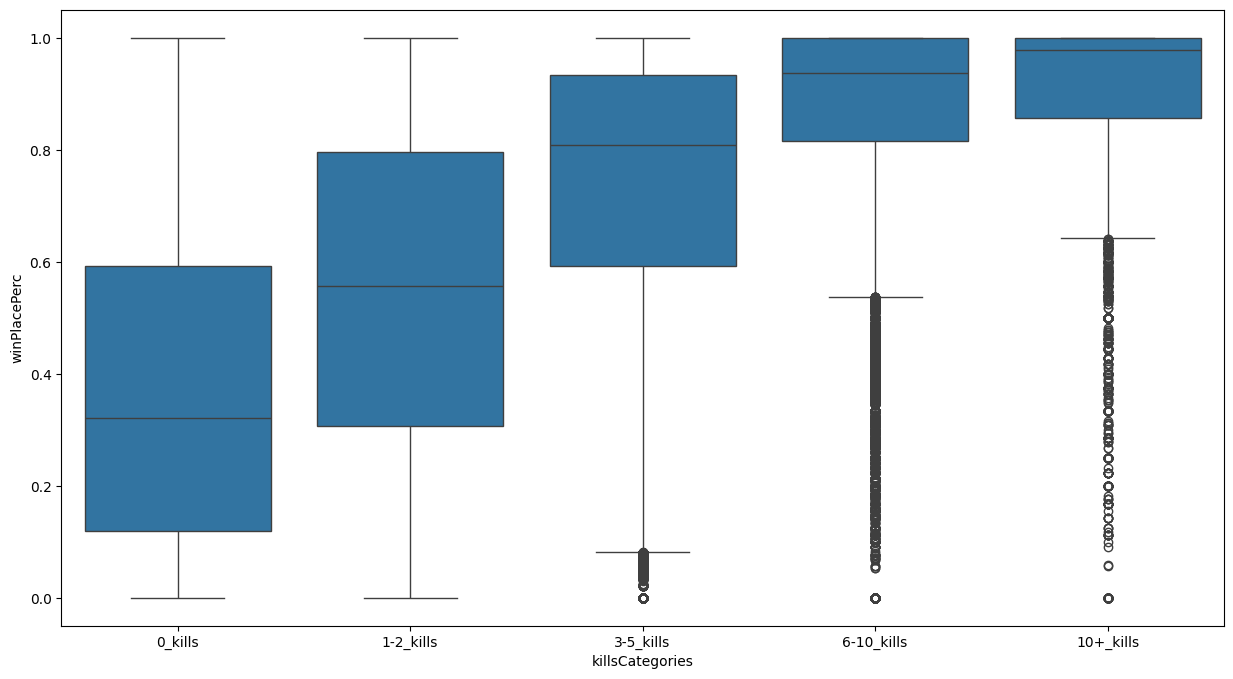

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

kills = df.copy()

kills['killsCategories'] = pd.cut(kills['kills'], [-1,0,2,5,10,60], labels= ['0_kills', '1-2_kills', '3-5_kills', '6-10_kills', '10+_kills'])
plt.figure(figsize=(15,8))
sns.boxplot(x='killsCategories', y='winPlacePerc', data=kills)
plt.show()

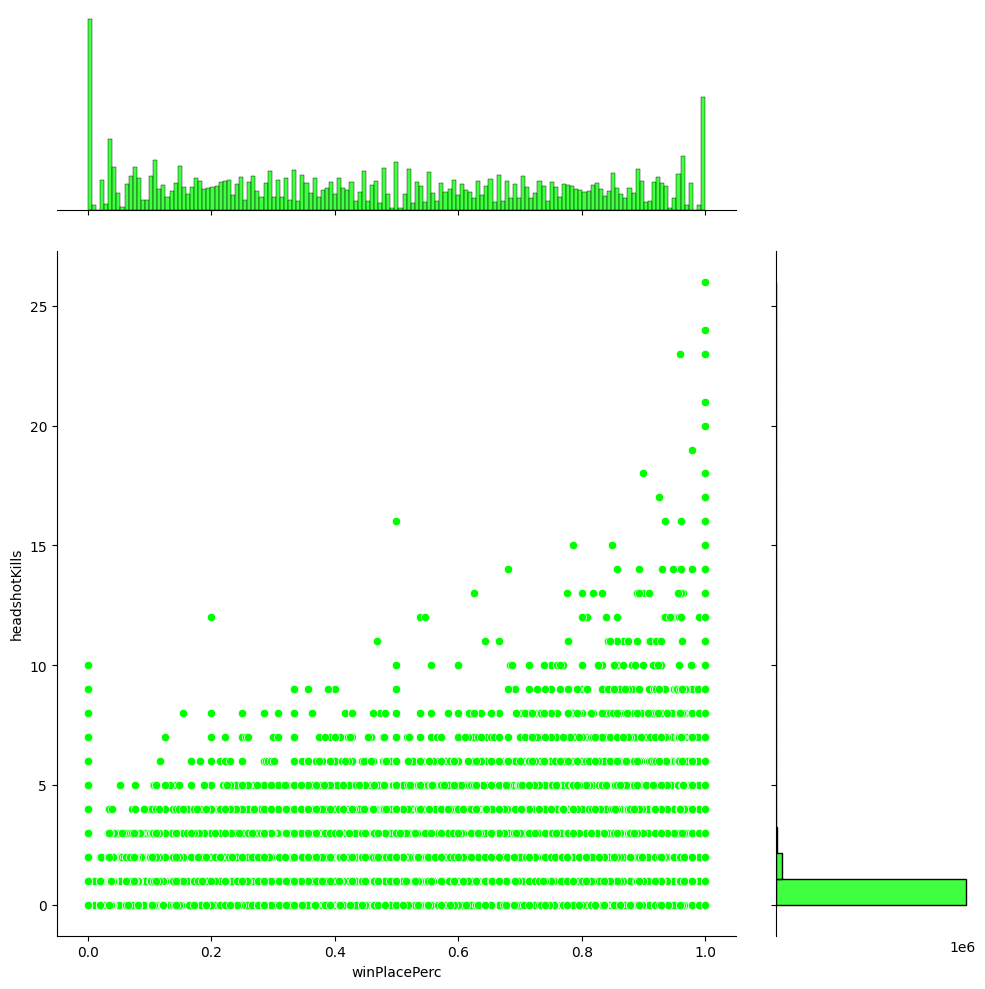

In [12]:
sns.jointplot(x='winPlacePerc',y='headshotKills', data=df, height=10, ratio=3, color="lime")
plt.show()

**Define outlier data**  

### Automated aiming

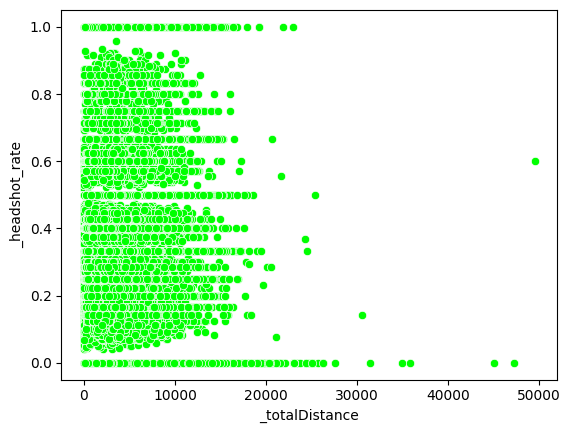

In [13]:
# Low Total distance, high headshot percentage
df['_totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']

df['_headshot_rate'] = df['headshotKills']/df['kills']
df['_headshot_rate'] = df['_headshot_rate'].fillna(0)

sns.scatterplot(x='_totalDistance',y='_headshot_rate', data=df, color="lime");

### Inhuman Kills

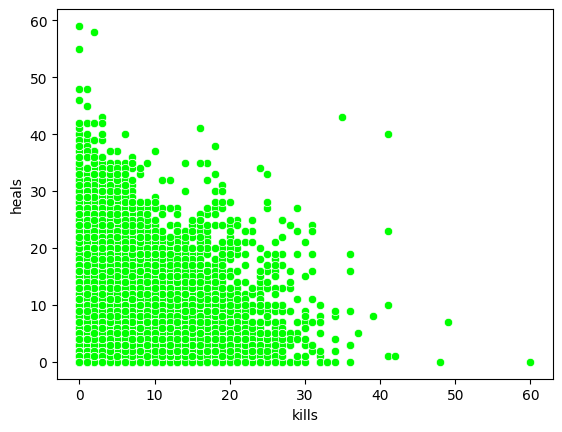

In [14]:
# high kills without heal
sns.scatterplot(x='kills',y='heals', data=df, color="lime");

### 100% Headshot Kills

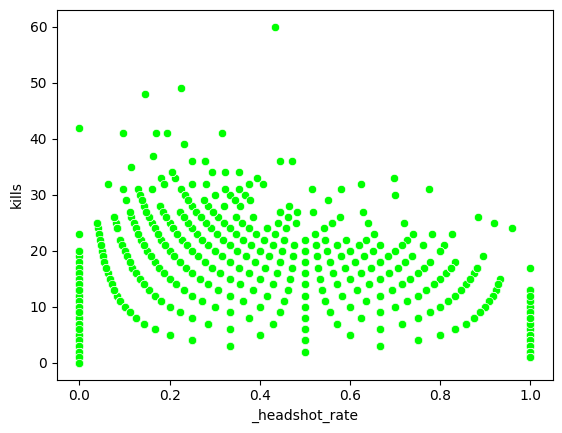

In [15]:
# users with 100% headshots?
sns.scatterplot(x='_headshot_rate',y='kills', data=df, color="lime");

### Anomalies in Heals

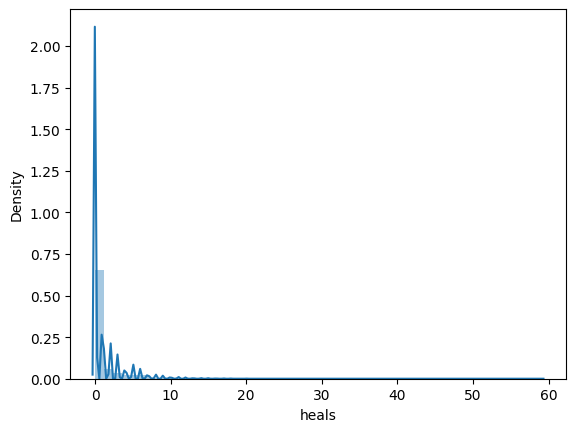

In [16]:
# too much heals?
sns.distplot(df['heals']);

### Without moving & WeaponsAcquired

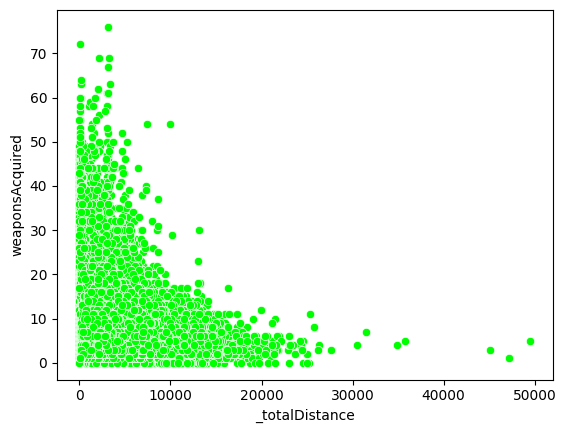

In [17]:
# users gaining weapon without moving?
sns.scatterplot(x='_totalDistance',y='weaponsAcquired', data=df, color="lime");

**Modeling abnormality**  

### Automated aiming - analysis

In [18]:
# _totalDistance, _headshot_rate
df_1 = df[(df['_totalDistance'] <= df['_totalDistance'].quantile(0.10)) & (df['_headshot_rate']  >= 0.8)]
print(len(df_1))
df_1.head()

9276


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
200,200,445186,200,0,0,240.2,1,1,0,41,1133,1,1,1.153,28,28,0,0.0,0,0.0,0,0,31.20,1,1481,0.0000,31.20,1.0
403,403,1337806,403,0,0,249.2,1,1,0,34,1326,1,1,4.841,38,35,0,0.0,0,0.0,0,0,32.71,1,1447,0.0000,32.71,1.0
784,784,2606376,784,0,0,189.2,0,1,0,42,1093,1,1,34.690,96,94,0,0.0,0,0.0,0,0,35.39,1,1477,0.2000,35.39,1.0
1441,1441,197195,1441,0,0,100.0,0,1,0,33,1024,1,1,36.790,96,95,0,0.0,0,0.0,0,0,31.32,1,1484,0.1158,31.32,1.0
1565,1565,250485,1565,0,0,100.0,1,1,0,33,1000,1,1,6.801,20,20,0,0.0,0,0.0,0,0,35.17,1,1500,0.1053,35.17,1.0


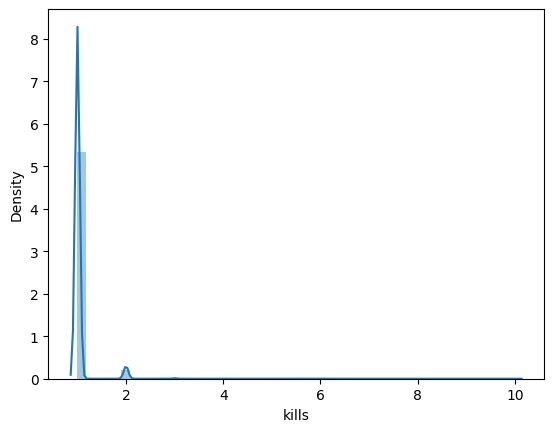

In [19]:
# narrow down data by checking distribution of number of kills
sns.distplot(df_1['kills']);

In [20]:
df['_totalDistance'].quantile(0.10), df['_totalDistance'].quantile(0.90)

(37.89, 3812.67)

In [21]:
# identify abnormal users 
df_1[df_1['kills'] > 6][['kills', '_totalDistance', '_headshot_rate']]

,kills,_totalDistance,_headshot_rate
500360,8,0.00,0.875000
524698,10,30.83,0.800000
1177100,7,0.00,0.857143
2383933,10,0.00,0.800000
3277980,7,14.52,0.857143


### Inhuman Kills - analysis

In [22]:
# mean heal count
df[['heals', 'kills']].describe()

,heals,kills
count,4.357336e+06,4.357336e+06
mean,1.187169e+00,9.344958e-01
std,2.366389e+00,1.566192e+00
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00
75%,1.000000e+00,1.000000e+00
max,5.900000e+01,6.000000e+01


In [23]:
df['heals'].quantile(0.10), df['kills'].quantile(0.90)

(0.0, 3.0)

In [24]:
df['kills'].mean()+3*df['kills'].std()

5.633072738084219

In [25]:
# 0 heal, users with kill #: avg * 3 standard deviations 
df_2 = df[(df['heals'] <= df['heals'].quantile(0.10)) & (df['kills']  >= df['kills'].mean()+3*df['kills'].std())]
print(len(df_2))
df_2[['heals', 'kills']]

8238


,heals,kills
79,0,7
161,0,7
531,0,16
745,0,7
976,0,6
...,...,...
4354081,0,7
4355347,0,8
4356162,0,6
4356264,0,8


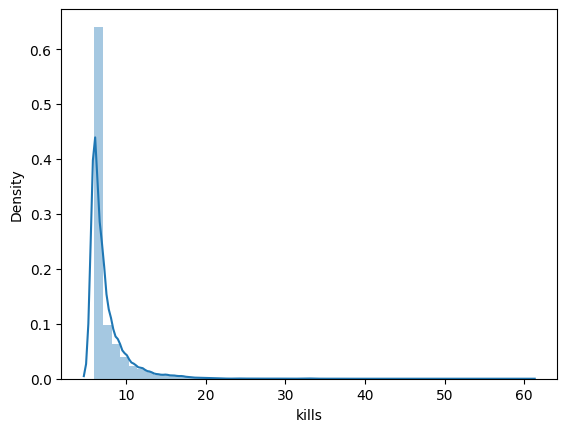

In [26]:
sns.distplot(df_2['kills']);

In [27]:
# find out abnormal users
df_2[df_2['kills'] > 30][['kills', 'heals']].sort_values(by=['kills'], ascending =False)

,kills,heals
910050,60,0
74095,48,0
455912,36,0
88198,34,0
34674,33,0
319149,33,0
722495,33,0
4138946,33,0
409678,32,0
671890,32,0


### 100% Headshot Kills - analysis

In [28]:
# users with headshot 100%
df_3 = df[df['_headshot_rate'] == 1]
print(len(df_3))
df[df['_headshot_rate'] == 1].head()

266984


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
1,1,440875,1,1,0,37.65,1,1,0,45,1072,1,1,13.550,26,23,0,0.0,0,0.00,0,0,119.6,3,1511,0.0400,119.60,1.0
10,10,45059,10,0,1,166.00,0,1,1,35,1000,1,1,31.130,98,96,0,0.0,0,0.00,0,0,184.5,3,1500,0.4536,184.50,1.0
32,32,1010453,32,0,3,214.90,1,2,4,19,1047,2,1,127.000,49,48,0,1576.0,0,0.00,0,0,1526.0,3,1502,0.7292,3102.00,1.0
33,33,1054979,33,0,0,166.20,1,1,0,37,1281,1,1,1.657,30,30,0,0.0,0,0.00,0,0,133.1,2,1544,0.2414,133.10,1.0
50,50,1802026,50,0,3,360.30,3,2,15,15,1046,2,1,4.853,26,26,0,0.0,0,75.86,0,0,2669.0,6,1480,0.6800,2744.86,1.0


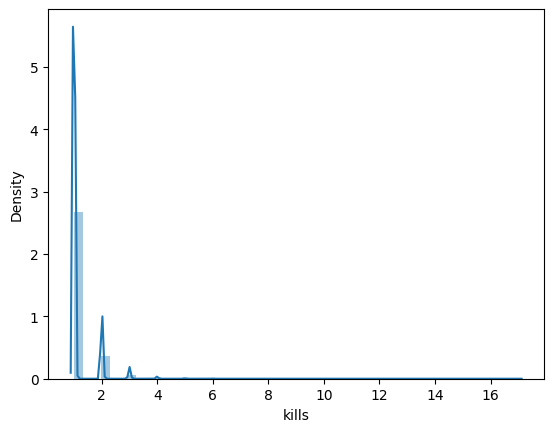

In [29]:
sns.distplot(df_3['kills']);

In [30]:
df_3['kills'].describe()

count    266984.000000
mean          1.173804
std           0.479215
min           1.000000
25%           1.000000
50%           1.000000
75%           1.000000
max          17.000000
Name: kills, dtype: float64

In [31]:
df_3['kills'].mean()+3*df_3['kills'].std()

2.6114506424929758

In [32]:
# find out abnormal users
df_3[df_3['kills'] > 10][['kills', '_headshot_rate']].sort_values(by=['kills'], ascending =False)

,kills,_headshot_rate
3902972,17,1.0
2411348,13,1.0
3201166,13,1.0
3409867,13,1.0
4277997,12,1.0
458289,11,1.0
3204285,11,1.0
4242764,11,1.0


### Anomalies in Heals - analysis

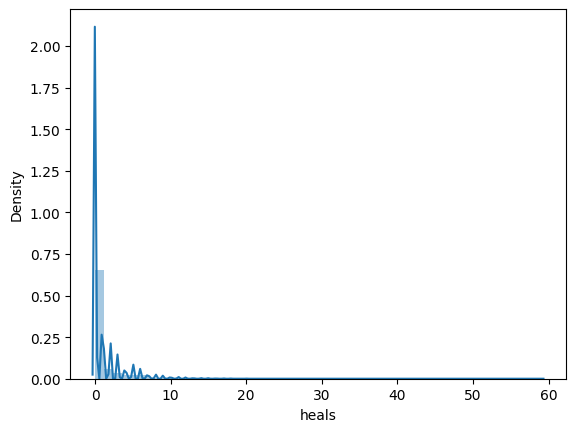

In [33]:
# find out how users are using heal items
sns.distplot(df['heals']);

In [34]:
df['heals'].describe()

count    4.357336e+06
mean     1.187169e+00
std      2.366389e+00
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      1.000000e+00
max      5.900000e+01
Name: heals, dtype: float64

In [35]:
# identify abnormal users
df[df['heals']>50]['heals']

271303     55
721128     58
1546110    59
Name: heals, dtype: int64

### Without moving & WeaponsAcquired - analysis

In [36]:
# check threshold
df['_totalDistance'].quantile(0.10), df['weaponsAcquired'].quantile(0.90)

(37.89, 6.0)

In [37]:
#identify users
df_5 = df[(df['_totalDistance'] <= df['_totalDistance'].quantile(0.10)) & (df['weaponsAcquired']  >= df['weaponsAcquired'].quantile(0.90))]
print(len(df_5))
df_5.head()

2265


,Id,groupId,matchId,assists,boosts,damageDealt,DBNOs,headshotKills,heals,killPlace,killPoints,kills,killStreaks,longestKill,maxPlace,numGroups,revives,rideDistance,roadKills,swimDistance,teamKills,vehicleDestroys,walkDistance,weaponsAcquired,winPoints,winPlacePerc,_totalDistance,_headshot_rate
896,896,2655234,896,0,0,296.1,2,0,1,17,1000,0,0,0.000,6,6,0,0.0,0,0.0,1,0,0.0,8,1500,0.2000,0.0,0.000000
1777,1777,344864,1777,6,0,1087.0,13,6,0,1,1000,12,2,1.539,4,4,5,0.0,0,0.0,0,0,0.0,9,1500,1.0000,0.0,0.500000
3260,3260,993275,3260,0,0,510.9,0,1,0,6,1000,6,1,46.490,14,10,0,0.0,0,0.0,0,0,0.0,10,1500,0.7692,0.0,0.166667
3405,3405,1057673,3405,3,1,1462.0,0,5,6,1,1000,15,1,83.780,7,7,0,0.0,0,0.0,0,0,0.0,29,1500,1.0000,0.0,0.333333
3612,3612,1148248,3612,12,0,2322.0,19,5,0,2,1000,18,2,87.960,5,5,0,0.0,0,0.0,0,0,0.0,33,1500,0.7500,0.0,0.277778


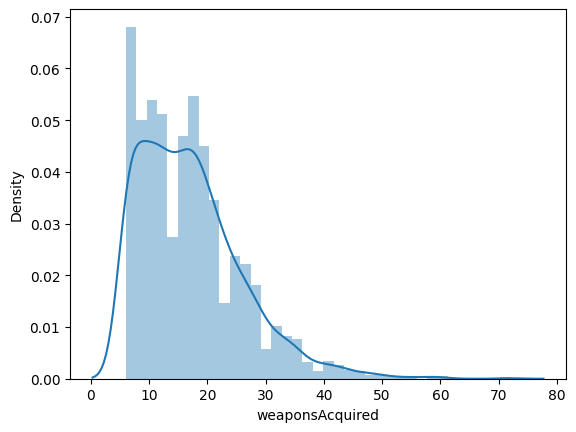

In [38]:
sns.distplot(df_5['weaponsAcquired']);

In [39]:
# find out abnormal users
df_5[df_5['weaponsAcquired']>50][['_totalDistance', 'weaponsAcquired']].sort_values(by=['_totalDistance'])

,_totalDistance,weaponsAcquired
1525623,0.000,55
492307,8.284,58
455912,9.554,58
74113,18.790,53
817586,24.380,60
198722,24.570,60
444634,25.310,51
1072609,30.490,72
966854,34.290,55
550242,37.670,51


Saving figure flagged_by_rule


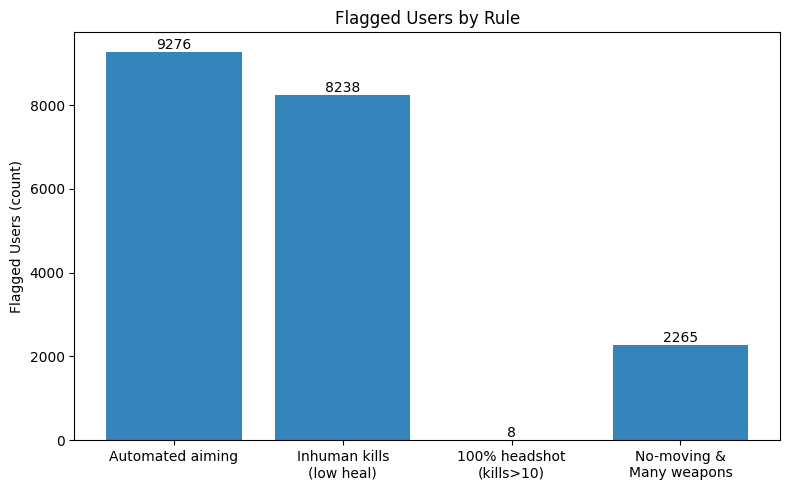

In [40]:
if '_totalDistance' not in df.columns:
    df['_totalDistance'] = df['rideDistance'] + df['walkDistance'] + df['swimDistance']
if '_headshot_rate' not in df.columns:
    df['_headshot_rate'] = (df['headshotKills'] / df['kills']).fillna(0)

td_q10  = df['_totalDistance'].quantile(0.10)
heal_q10= df['heals'].quantile(0.10)
weap_q90= df['weaponsAcquired'].quantile(0.90)
kill_mu, kill_sd = df['kills'].mean(), df['kills'].std()

df_1 = df[(df['_totalDistance'] <= td_q10) & (df['_headshot_rate'] >= 0.8)]
df_2 = df[(df['heals'] <= heal_q10) & (df['kills'] >= kill_mu + 3*kill_sd)]
df_3_base = df[df['_headshot_rate'] == 1]
df_3 = df_3_base[df_3_base['kills'] > 10]
df_5 = df[(df['_totalDistance'] <= td_q10) & (df['weaponsAcquired'] >= weap_q90)]

labels = ['Automated aiming', 'Inhuman kills\n(low heal)', '100% headshot\n(kills>10)', 'No-moving &\nMany weapons']
values = [len(df_1), len(df_2), len(df_3), len(df_5)]

plt.figure(figsize=(8,5))
bars = plt.bar(labels, values)
for b in bars:
    b.set_alpha(0.9)
plt.ylabel('Flagged Users (count)')
plt.title('Flagged Users by Rule')

for x, v in enumerate(values):
    plt.text(x, v, str(v), ha='center', va='bottom')

save_fig('flagged_by_rule')
plt.show()


Saving figure distance_vs_headshot_thresholds


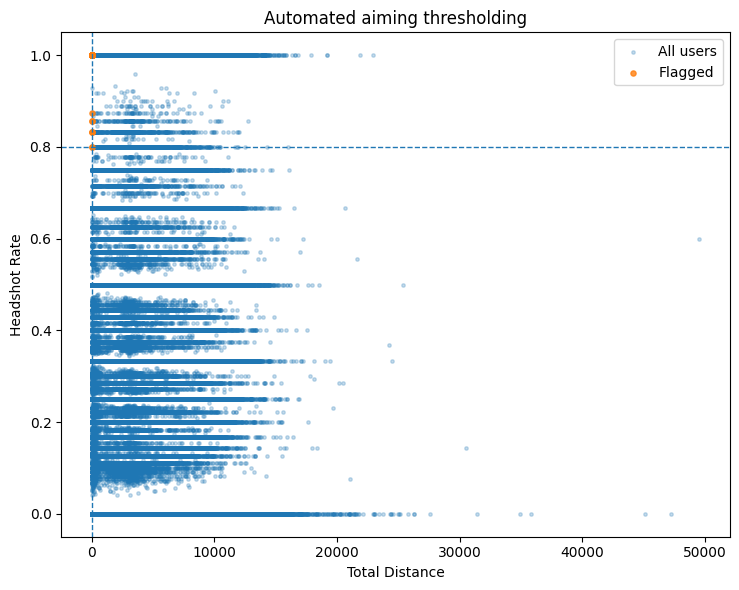

In [42]:
td_q10 = df['_totalDistance'].quantile(0.10)

plt.figure(figsize=(7.5,6))
plt.scatter(df['_totalDistance'], df['_headshot_rate'], s=6, alpha=0.25, label='All users')
flag = (df['_totalDistance'] <= td_q10) & (df['_headshot_rate'] >= 0.8)
plt.scatter(df.loc[flag, '_totalDistance'], df.loc[flag, '_headshot_rate'], s=14, alpha=0.8, label='Flagged')

plt.axvline(td_q10, linestyle='--', linewidth=1)
plt.axhline(0.8,   linestyle='--', linewidth=1)

plt.xlabel('Total Distance')
plt.ylabel('Headshot Rate')
plt.title('Automated aiming thresholding')
plt.legend()

save_fig('distance_vs_headshot_thresholds')
plt.show()
